In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [274]:
avocado = pd.read_csv("Data/avocado.csv")

In [275]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [276]:
encoder = LabelEncoder()
avocado['type'] = encoder.fit_transform(avocado['type'])
avocado['region'] = encoder.fit_transform(avocado['region'])

In [277]:

avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['month'] = avocado['Date'].apply(lambda x:x.month)
avocado['day'] = avocado['Date'].apply(lambda x:x.day)


In [278]:
y = avocado['AveragePrice']

In [279]:
X = avocado.drop(columns = ["AveragePrice",'Unnamed: 0','Date'], axis = 1)

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101 )

In [281]:
Steps = [('scaler', StandardScaler()),
         ('poly', PolynomialFeatures(degree=2)),
         ('model', RandomForestRegressor())]

In [282]:
mdl = Pipeline(Steps)

In [283]:
mdl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
      ...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [284]:
print(mdl.score(X_train, y_train))
print(mdl.score(X_test, y_test))

0.975647693720342
0.8705464514346111


In [285]:
predictions = mdl.predict(X_train)
predictions2 = mdl.predict(X_test)

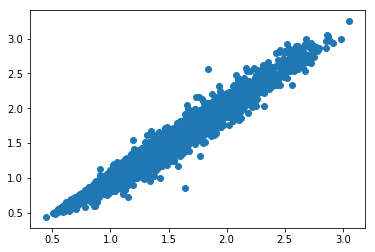

In [286]:
plt.scatter(x = predictions, y = y_train)

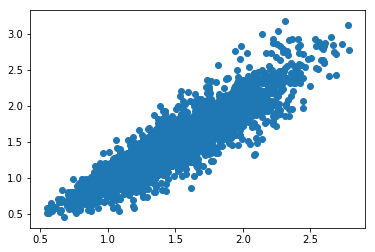

In [287]:
plt.scatter(x = predictions2, y = y_test)

In [290]:
featur = pd.DataFrame(mdl.named_steps['model'].feature_importances_, columns = ['Importance'])